In [1]:
import pandas as pd
import numpy as np
from helper_functions import *
import matplotlib.pyplot as plt

# Watercooker

In [2]:
df_wc = pd.read_csv('C:/Users/sanam/Documents/SynD_processed/watercooker.csv', index_col=0)

In [3]:
df_wc.index = pd.to_datetime(df_wc.index)

In [4]:
df_wc

,value
timestamp,
2019-09-29 00:00:00,0.0
2019-09-29 00:00:01,0.0
2019-09-29 00:00:02,0.0
2019-09-29 00:00:03,0.0
2019-09-29 00:00:04,0.0
...,...
2020-03-26 23:59:55,0.0
2020-03-26 23:59:56,0.0
2020-03-26 23:59:57,0.0


In [5]:
df_wc_train, df_wc_test = split_train_test(df_wc, '2019-09-29','2020-01-01')

### Train

In [6]:
wc_at_train = activation_times(df_wc_train)
wc_at_train

Model is not converging.  Current: 75490090.75245406 is not greater than 75490090.75277069. Delta is -0.00031663477420806885


,power_consumption_before,power_consumption_during,power_consumption_after
2019-09-29 11:17:44,0.00008,1117.92016,1882.84
2019-09-30 12:16:28,0.00000,376.58024,1871.04
2019-10-01 09:52:38,0.00024,1871.12000,1882.18
2019-10-02 10:40:11,0.00000,753.16024,1882.74
2019-10-03 11:38:09,0.00008,1117.92016,1882.84
...,...,...,...
2019-12-27 11:00:52,0.00008,1129.76016,1882.60
2019-12-28 11:38:52,0.00008,1117.92016,1882.84
2019-12-29 10:40:42,0.00016,1506.36008,1882.24
2019-12-30 12:31:30,0.00000,753.16024,1882.74


In [7]:
df_wc_at_train = add_time_frame(wc_at_train)
df_wc_at_train

ti,0am-6am,6am-12pm,12pm-6pm,6pm-12am,day
2019-09-29,0,1,0,0,Sunday
2019-09-30,0,0,1,0,Monday
2019-10-01,0,1,0,0,Tuesday
2019-10-02,0,1,0,0,Wednesday
2019-10-03,0,1,0,0,Thursday
...,...,...,...,...,...
2019-12-27,0,1,0,0,Friday
2019-12-28,0,1,0,0,Saturday
2019-12-29,0,1,0,0,Sunday
2019-12-30,0,0,1,0,Monday


In [8]:
df_wc_at_train[df_wc_at_train['day'] == 'Friday']

ti,0am-6am,6am-12pm,12pm-6pm,6pm-12am,day
2019-10-04,0,1,0,0,Friday
2019-10-11,0,1,0,0,Friday
2019-10-18,0,1,0,0,Friday
2019-10-25,0,1,0,0,Friday
2019-11-01,0,0,1,0,Friday
2019-11-08,0,0,1,0,Friday
2019-11-15,0,1,0,0,Friday
2019-11-22,0,1,0,0,Friday
2019-11-29,0,0,1,0,Friday
2019-12-06,0,0,1,0,Friday


In [9]:
wc_pivot_table = create_pivot_table(df_wc_at_train)
wc_pivot_table

ti,0am-6am,12pm-6pm,6am-12pm,6pm-12am
day,,,,
Friday,0,5,8,0
Monday,0,5,9,0
Saturday,0,2,11,0
Sunday,0,2,12,0
Thursday,0,2,11,0
Tuesday,0,3,11,0
Wednesday,0,2,11,0


### Test

In [10]:
df_wc_test

,value
timestamp,
2020-01-01 00:00:00,0.0
2020-01-01 00:00:01,0.0
2020-01-01 00:00:02,0.0
2020-01-01 00:00:03,0.0
2020-01-01 00:00:04,0.0
...,...
2020-03-26 23:59:55,0.0
2020-03-26 23:59:56,0.0
2020-03-26 23:59:57,0.0


In [11]:
wc_at_test = activation_times(df_wc_test)
wc_at_test

Model is not converging.  Current: 68736021.36734332 is not greater than 68736021.36776295. Delta is -0.00041963160037994385


,power_consumption_before,power_consumption_during,power_consumption_after
2020-01-01 11:56:21,0.00016,1494.52008,1882.58
2020-01-02 11:05:47,0.00024,1882.96000,1881.84
2020-01-03 11:54:49,0.00000,376.58024,1871.04
2020-01-04 11:12:44,0.00016,1494.52008,1882.58
2020-01-05 11:28:48,0.00000,376.62024,1882.96
...,...,...,...
2020-03-22 10:31:05,0.00016,1506.36008,1882.24
2020-03-23 10:24:11,0.00000,753.16024,1882.74
2020-03-24 11:49:16,0.00008,1117.92016,1882.84
2020-03-25 12:05:26,0.00024,1882.96000,1881.84


In [12]:
df_wc_at_test = add_time_frame(wc_at_test)
df_wc_at_test

ti,0am-6am,6am-12pm,12pm-6pm,6pm-12am,day
2020-01-01,0,1,0,0,Wednesday
2020-01-02,0,1,0,0,Thursday
2020-01-03,0,1,0,0,Friday
2020-01-04,0,1,0,0,Saturday
2020-01-05,0,1,0,0,Sunday
...,...,...,...,...,...
2020-03-22,0,1,0,0,Sunday
2020-03-23,0,1,0,0,Monday
2020-03-24,0,1,0,0,Tuesday
2020-03-25,0,0,1,0,Wednesday


### BBA Watercooker

In [13]:
wc_bba = probabilities(wc_pivot_table)
wc_bba

ti,0am-6am,12pm-6pm,6am-12pm,6pm-12am
day,,,,
Friday,0.0,0.384615,0.615385,0.0
Monday,0.0,0.357143,0.642857,0.0
Saturday,0.0,0.153846,0.846154,0.0
Sunday,0.0,0.142857,0.857143,0.0
Thursday,0.0,0.153846,0.846154,0.0
Tuesday,0.0,0.214286,0.785714,0.0
Wednesday,0.0,0.153846,0.846154,0.0


In [14]:
wc_masses = calculate_belief_masses(df_wc_at_test,wc_bba)

In [15]:
wc_masses.loc['2020-01-01']['intervals']

{'0am-6am': array([0.1, 0. , 0.9]),
 '6am-12pm': array([0.59638554, 0.10843373, 0.29518072]),
 '12pm-6pm': array([0.08208955, 0.01492537, 0.90298507]),
 '6pm-12am': array([0.1, 0. , 0.9])}

## Microwave

In [16]:
df_mw = pd.read_csv('C:/Users/sanam/Documents/SynD_processed/microwave.csv', index_col=0)
df_mw.index = pd.to_datetime(df_mw.index)

In [17]:
df_mw_train, df_mw_test = split_train_test(df_mw, '2019-09-29','2020-01-01')

### Train

In [18]:
mw_at_train = activation_times(df_mw_train)
mw_at_train

,power_consumption_before,power_consumption_during,power_consumption_after
2019-09-29 17:19:30,0.0,33.857143,166.440000
2019-09-29 17:19:37,0.0,117.734286,145.417143
2019-09-29 17:21:34,0.0,16.589714,33.141714
2019-09-30 17:37:28,0.0,33.960000,134.530909
2019-09-30 17:37:38,0.0,29.552727,146.945455
...,...,...,...
2019-12-30 16:38:04,0.0,59.100000,146.720000
2019-12-30 16:40:52,0.0,16.588000,41.520800
2019-12-31 17:33:04,0.0,128.560000,128.533333
2019-12-31 17:33:12,0.0,115.626667,114.933333


In [19]:
df_mw_at_train = add_time_frame(mw_at_train)
df_mw_at_train

ti,0am-6am,6am-12pm,12pm-6pm,6pm-12am,day
2019-09-29,0,0,3,0,Sunday
2019-09-30,0,0,3,0,Monday
2019-10-01,0,0,3,0,Tuesday
2019-10-02,0,0,2,0,Wednesday
2019-10-03,0,0,2,0,Thursday
...,...,...,...,...,...
2019-12-27,0,0,3,0,Friday
2019-12-28,0,0,3,0,Saturday
2019-12-29,0,0,2,0,Sunday
2019-12-30,0,0,3,0,Monday


In [20]:
mw_pivot_table = create_pivot_table(df_mw_at_train)
mw_pivot_table

ti,0am-6am,12pm-6pm,6am-12pm,6pm-12am
day,,,,
Friday,0,35,0,0
Monday,0,38,0,0
Saturday,0,34,0,0
Sunday,0,38,0,0
Thursday,0,33,0,0
Tuesday,0,37,0,0
Wednesday,0,29,0,0


### Test

In [21]:
mw_test_at = activation_times(df_mw_test)
mw_test_at

Model is not converging.  Current: 68763852.68901522 is not greater than 68763852.68910442. Delta is -8.919835090637207e-05


,power_consumption_before,power_consumption_during,power_consumption_after
2020-01-01 16:31:00,0.0,96.735000,160.655000
2020-01-01 16:31:07,0.0,57.905000,143.920000
2020-01-01 16:32:04,0.0,24.891000,41.494000
2020-01-02 16:40:15,0.0,95.994545,158.230909
2020-01-02 16:40:25,0.0,114.720000,117.298182
...,...,...,...
2020-03-25 16:38:31,0.0,127.728000,126.032000
2020-03-25 16:38:40,0.0,114.608000,120.256000
2020-03-26 17:13:06,0.0,96.780000,128.420000
2020-03-26 17:13:14,0.0,57.862222,143.906667


In [22]:
df_mw_at_test = add_time_frame(mw_test_at)
df_mw_at_test

ti,0am-6am,6am-12pm,12pm-6pm,6pm-12am,day
2020-01-01,0,0,3,0,Wednesday
2020-01-02,0,0,2,0,Thursday
2020-01-03,0,0,2,0,Friday
2020-01-04,0,0,3,0,Saturday
2020-01-05,0,0,3,0,Sunday
...,...,...,...,...,...
2020-03-22,0,0,3,0,Sunday
2020-03-23,0,0,2,0,Monday
2020-03-24,0,0,2,0,Tuesday
2020-03-25,0,0,2,0,Wednesday


In [23]:
df_mw_at_test.loc['2020-01-06']

ti
0am-6am          0
6am-12pm         0
12pm-6pm         0
6pm-12am         3
day         Monday
Name: 2020-01-06 00:00:00, dtype: object

### BBA Microwave

In [24]:
mw_bba = probabilities(mw_pivot_table)
mw_bba

ti,0am-6am,12pm-6pm,6am-12pm,6pm-12am
day,,,,
Friday,0.0,1.0,0.0,0.0
Monday,0.0,1.0,0.0,0.0
Saturday,0.0,1.0,0.0,0.0
Sunday,0.0,1.0,0.0,0.0
Thursday,0.0,1.0,0.0,0.0
Tuesday,0.0,1.0,0.0,0.0
Wednesday,0.0,1.0,0.0,0.0


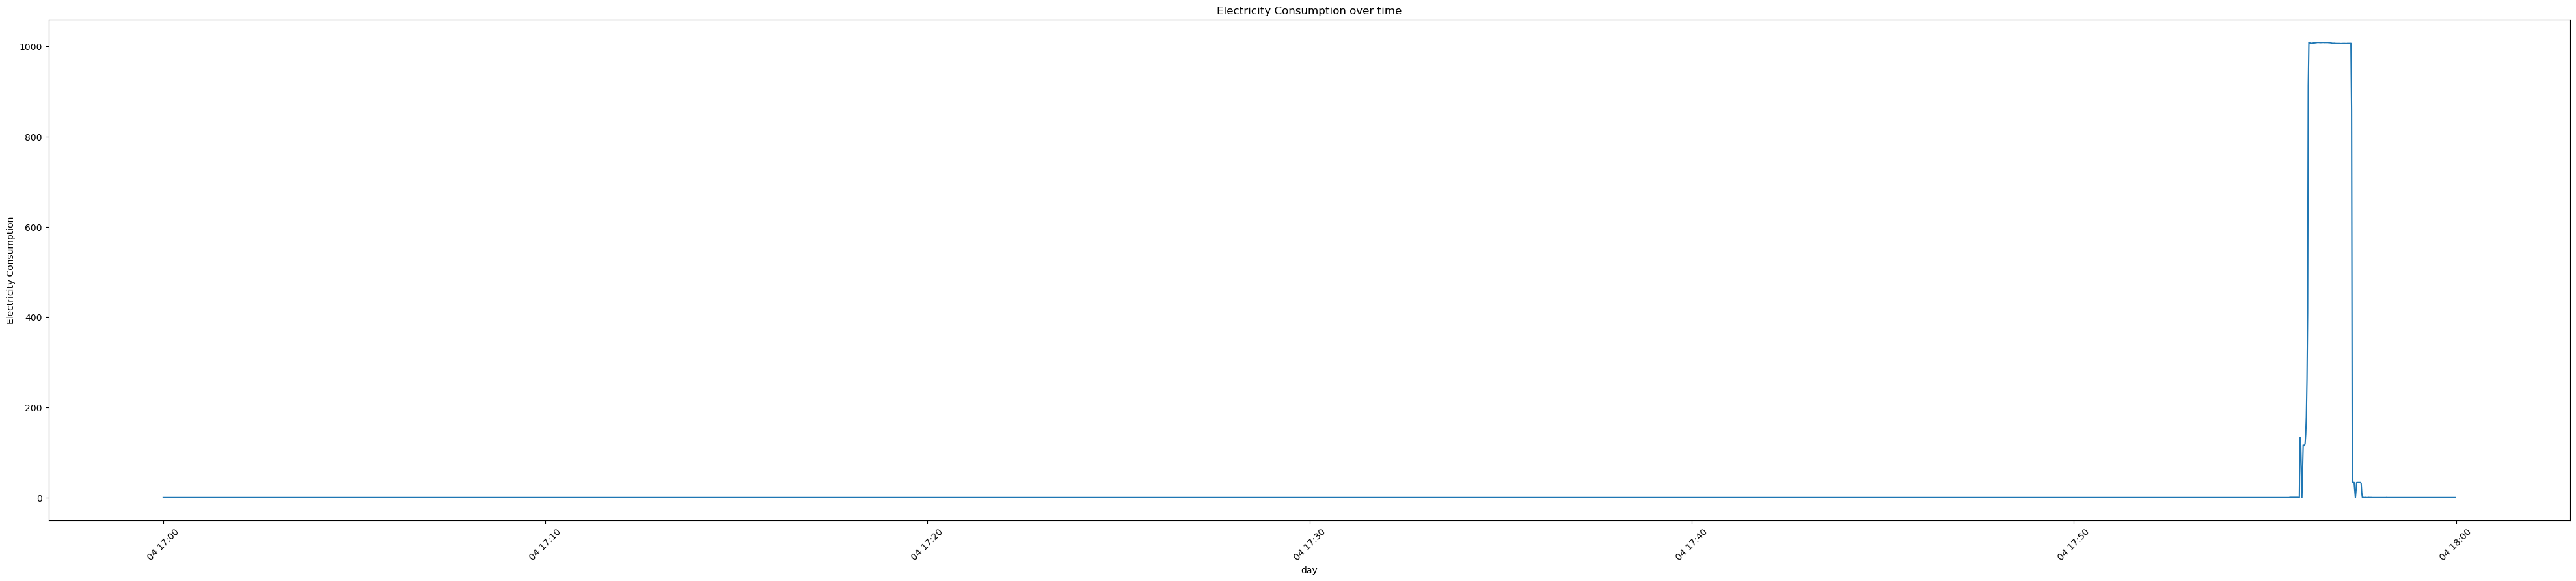

In [25]:
plot_usage(df_mw_test.loc['2020-01-04 17'])

In [26]:
mw_masses = calculate_belief_masses(df_mw_at_test,mw_bba)
mw_masses

,intervals
date,
2020-01-01,"{'0am-6am': [0.1, 0.0, 0.9], '6am-12pm': [0.1,..."
2020-01-02,"{'0am-6am': [0.1, 0.0, 0.9], '6am-12pm': [0.1,..."
2020-01-03,"{'0am-6am': [0.1, 0.0, 0.9], '6am-12pm': [0.1,..."
2020-01-04,"{'0am-6am': [0.1, 0.0, 0.9], '6am-12pm': [0.1,..."
2020-01-05,"{'0am-6am': [0.1, 0.0, 0.9], '6am-12pm': [0.1,..."
...,...
2020-03-22,"{'0am-6am': [0.1, 0.0, 0.9], '6am-12pm': [0.1,..."
2020-03-23,"{'0am-6am': [0.1, 0.0, 0.9], '6am-12pm': [0.1,..."
2020-03-24,"{'0am-6am': [0.1, 0.0, 0.9], '6am-12pm': [0.1,..."


## Toaster

In [27]:
df_t = pd.read_csv('C:/Users/sanam/Documents/SynD_processed/toaster.csv', index_col=0)
df_t.index = pd.to_datetime(df_t.index)

In [28]:
df_t_train, df_t_test = split_train_test(df_t, '2019-09-29','2020-01-01')

### Train

In [29]:
t_at_train = activation_times(df_t_train)
t_at_train

,power_consumption_before,power_consumption_during,power_consumption_after
2019-09-30 09:00:47,0.0002,316.6003,779.58
2019-10-01 09:36:46,0.0002,316.1203,772.34
2019-10-02 08:38:32,0.0005,781.5800,764.94
2019-10-03 08:58:07,0.0005,623.2201,768.62
2019-10-04 08:49:08,0.0002,316.1203,772.34
...,...,...,...
2019-12-26 09:01:47,0.0005,623.2201,768.62
2019-12-27 09:44:56,0.0005,776.8400,767.02
2019-12-28 08:52:04,0.0003,313.4603,773.10
2019-12-30 08:39:22,0.0003,472.2602,776.52


In [30]:
df_t_at_train = add_time_frame(t_at_train)
df_t_at_train

ti,0am-6am,6am-12pm,12pm-6pm,6pm-12am,day
2019-09-30,0,1,0,0,Monday
2019-10-01,0,1,0,0,Tuesday
2019-10-02,0,1,0,0,Wednesday
2019-10-03,0,1,0,0,Thursday
2019-10-04,0,1,0,0,Friday
...,...,...,...,...,...
2019-12-26,0,1,0,0,Thursday
2019-12-27,0,1,0,0,Friday
2019-12-28,0,1,0,0,Saturday
2019-12-30,0,1,0,0,Monday


In [31]:
t_pivot_table = create_pivot_table(df_t_at_train)
t_pivot_table

ti,0am-6am,12pm-6pm,6am-12pm,6pm-12am
day,,,,
Friday,0,0,12,0
Monday,0,0,14,0
Saturday,0,0,11,0
Sunday,0,0,12,0
Thursday,0,0,12,0
Tuesday,0,0,13,0
Wednesday,0,0,13,0


### Test

In [32]:
t_at_test = activation_times(df_t_test)
t_at_test

Model is not converging.  Current: 68891055.69921653 is not greater than 68891055.70128906. Delta is -0.0020725280046463013


,power_consumption_before,power_consumption_during,power_consumption_after
2020-01-01 07:53:28,0.0000,154.1800,766.38
2020-01-02 09:00:11,0.0003,471.8202,769.66
2020-01-03 08:50:13,0.0004,628.6801,774.08
2020-01-04 09:27:23,0.0005,623.2201,768.62
2020-01-05 08:36:43,0.0001,157.5804,777.52
...,...,...,...
2020-03-22 08:55:57,0.0004,628.6801,774.08
2020-03-23 08:20:03,0.0000,154.0200,765.80
2020-03-24 09:00:31,0.0000,767.5400,764.82
2020-03-25 09:17:04,0.0000,614.5400,764.46


In [33]:
df_t_at_test = add_time_frame(t_at_test)
df_t_at_test

ti,0am-6am,6am-12pm,12pm-6pm,6pm-12am,day
2020-01-01,0,1,0,0,Wednesday
2020-01-02,0,1,0,0,Thursday
2020-01-03,0,1,0,0,Friday
2020-01-04,0,1,0,0,Saturday
2020-01-05,0,1,0,0,Sunday
...,...,...,...,...,...
2020-03-22,0,1,0,0,Sunday
2020-03-23,0,1,0,0,Monday
2020-03-24,0,1,0,0,Tuesday
2020-03-25,0,1,0,0,Wednesday


### BBA Toaster

In [34]:
t_bba = probabilities(t_pivot_table)
t_bba

ti,0am-6am,12pm-6pm,6am-12pm,6pm-12am
day,,,,
Friday,0.0,0.0,1.0,0.0
Monday,0.0,0.0,1.0,0.0
Saturday,0.0,0.0,1.0,0.0
Sunday,0.0,0.0,1.0,0.0
Thursday,0.0,0.0,1.0,0.0
Tuesday,0.0,0.0,1.0,0.0
Wednesday,0.0,0.0,1.0,0.0


In [35]:
t_masses = calculate_belief_masses(df_t_at_test, t_bba)
t_masses

,intervals
date,
2020-01-01,"{'0am-6am': [0.1, 0.0, 0.9], '6am-12pm': [0.9,..."
2020-01-02,"{'0am-6am': [0.1, 0.0, 0.9], '6am-12pm': [0.9,..."
2020-01-03,"{'0am-6am': [0.1, 0.0, 0.9], '6am-12pm': [0.9,..."
2020-01-04,"{'0am-6am': [0.1, 0.0, 0.9], '6am-12pm': [0.9,..."
2020-01-05,"{'0am-6am': [0.1, 0.0, 0.9], '6am-12pm': [0.9,..."
...,...
2020-03-22,"{'0am-6am': [0.1, 0.0, 0.9], '6am-12pm': [0.9,..."
2020-03-23,"{'0am-6am': [0.1, 0.0, 0.9], '6am-12pm': [0.9,..."
2020-03-24,"{'0am-6am': [0.1, 0.0, 0.9], '6am-12pm': [0.9,..."


### Television

In [36]:
df_tv = pd.read_csv('C:/Users/sanam/Documents/SynD_processed/tv.csv', index_col=0)
df_tv.index = pd.to_datetime(df_tv.index)

In [37]:
df_tv_train, df_tv_test = split_train_test(df_tv, '2019-09-29','2020-01-01')

### Train

In [38]:
tv_at = activation_times(df_tv_train)
tv_at

,power_consumption_before,power_consumption_during,power_consumption_after
2019-09-29 19:30:16,0.0,54.563607,136.405583
2019-09-29 20:40:09,0.0,136.216000,39.494000
2019-09-30 19:57:37,0.0,136.408107,136.403373
2019-09-30 20:01:02,0.0,27.264000,112.146000
2019-10-01 17:05:31,0.0,54.563644,136.402889
...,...,...,...
2019-12-29 20:19:03,0.0,136.216000,39.494000
2019-12-30 20:57:35,0.0,109.127312,136.406559
2019-12-30 21:31:28,0.0,136.226000,17.876000
2019-12-31 19:37:55,0.0,27.282000,136.407867


In [39]:
df_tv_at_train = add_time_frame(tv_at)
df_tv_at_train

ti,0am-6am,6am-12pm,12pm-6pm,6pm-12am,day
2019-09-29,0,0,0,2,Sunday
2019-09-30,0,0,0,2,Monday
2019-10-01,0,0,1,1,Tuesday
2019-10-02,0,0,0,2,Wednesday
2019-10-03,0,0,0,2,Thursday
...,...,...,...,...,...
2019-12-27,0,0,0,2,Friday
2019-12-28,0,0,0,2,Saturday
2019-12-29,0,0,0,2,Sunday
2019-12-30,0,0,0,2,Monday


In [40]:
tv_pivot_table = create_pivot_table(df_tv_at_train)
tv_pivot_table

ti,0am-6am,12pm-6pm,6am-12pm,6pm-12am
day,,,,
Friday,0,5,0,21
Monday,0,5,0,23
Saturday,0,2,0,24
Sunday,0,8,0,20
Thursday,0,2,0,24
Tuesday,0,6,0,22
Wednesday,0,4,0,22


### Test

In [41]:
tv_at_test = activation_times(df_tv_test)
tv_at_test

,power_consumption_before,power_consumption_during,power_consumption_after
2020-01-01 18:53:26,0.0,81.845186,136.403220
2020-01-01 19:46:49,0.0,81.776000,65.054000
2020-01-02 19:00:21,0.0,109.125843,136.399213
2020-01-02 20:07:32,0.0,54.520000,88.704000
2020-01-03 17:44:28,0.0,27.282000,136.406571
...,...,...,...
2020-03-24 21:38:50,0.0,27.246000,135.930000
2020-03-25 17:27:01,0.0,27.281852,136.404815
2020-03-25 18:03:31,0.0,81.750000,86.682000
2020-03-26 20:12:15,0.0,81.845411,136.405092


In [42]:
df_tv_at_test = add_time_frame(tv_at_test)
df_tv_at_test

ti,0am-6am,6am-12pm,12pm-6pm,6pm-12am,day
2020-01-01,0,0,0,2,Wednesday
2020-01-02,0,0,0,2,Thursday
2020-01-03,0,0,1,1,Friday
2020-01-04,0,0,1,1,Saturday
2020-01-05,0,0,0,2,Sunday
...,...,...,...,...,...
2020-03-22,0,0,2,0,Sunday
2020-03-23,0,0,0,2,Monday
2020-03-24,0,0,0,2,Tuesday
2020-03-25,0,0,1,1,Wednesday


### BBA TV

In [43]:
tv_bba = probabilities(tv_pivot_table)
tv_bba

ti,0am-6am,12pm-6pm,6am-12pm,6pm-12am
day,,,,
Friday,0.0,0.192308,0.0,0.807692
Monday,0.0,0.178571,0.0,0.821429
Saturday,0.0,0.076923,0.0,0.923077
Sunday,0.0,0.285714,0.0,0.714286
Thursday,0.0,0.076923,0.0,0.923077
Tuesday,0.0,0.214286,0.0,0.785714
Wednesday,0.0,0.153846,0.0,0.846154


In [44]:
tv_masses = calculate_belief_masses(df_tv_at_test, tv_bba)
tv_masses

,intervals
date,
2020-01-01,"{'0am-6am': [0.1, 0.0, 0.9], '6am-12pm': [0.1,..."
2020-01-02,"{'0am-6am': [0.1, 0.0, 0.9], '6am-12pm': [0.1,..."
2020-01-03,"{'0am-6am': [0.1, 0.0, 0.9], '6am-12pm': [0.1,..."
2020-01-04,"{'0am-6am': [0.1, 0.0, 0.9], '6am-12pm': [0.1,..."
2020-01-05,"{'0am-6am': [0.1, 0.0, 0.9], '6am-12pm': [0.1,..."
...,...
2020-03-22,"{'0am-6am': [0.1, 0.0, 0.9], '6am-12pm': [0.1,..."
2020-03-23,"{'0am-6am': [0.1, 0.0, 0.9], '6am-12pm': [0.1,..."
2020-03-24,"{'0am-6am': [0.1, 0.0, 0.9], '6am-12pm': [0.1,..."


## BBA Fusion

In [45]:
def calculate_masses(m_X, m_Y):
    m_h1_1 = m_Y[0] * m_X[0]
    m_h1_2 = m_Y[0] * m_X[1]
    m_h1_3 = m_Y[0] * m_X[2]
    m_h2_1 = m_Y[1] * m_X[0]
    m_h2_2 = m_Y[1] * m_X[1]
    m_h2_3 = m_Y[1] * m_X[2]
    m_h3_1 = m_Y[2] * m_X[0]
    m_h3_2 = m_Y[2] * m_X[1]
    m_h3_3 = m_Y[2] * m_X[2]
    k = m_h1_2 + m_h2_1
    m_h1 = round((m_h1_1 + m_h1_3 + m_h3_1) / (1 - k), 3)
    m_h2 = round((m_h2_2 + m_h2_3 + m_h3_2) / (1 - k), 3)
    m_h3 = round(m_h3_3 / (1 - k), 3)
    return [m_h1, m_h2, m_h3]

In [46]:
def bba_fusion(m1, m2):
    fusion = []
    dates = list(m1.index)
    tis = list(m1.loc[dates[0]]['intervals'].keys())

    for date in dates:
        date_data = {'date': date, 'intervals': {}}
        for ti in tis:
            try:
                m_X = m1.loc[date]['intervals'][ti]
            except KeyError:
                date_data['intervals'][ti] = m2.loc[date]['intervals'][ti]
                # Skip to the next date
                continue
            try:
                m_Y = m2.loc[date]['intervals'][ti]
            except KeyError:
                date_data['intervals'][ti] = m1.loc[date]['intervals'][ti]
                # Skip to the next date
                continue

            # Calculate masses using the calculate_masses function
            masses = calculate_masses(m_X, m_Y)
            date_data['intervals'][ti] = masses

        fusion.append(date_data)

    # Convert the list of dictionaries into a DataFrame
    df_fusion = pd.DataFrame(fusion)
    
    # Set the 'date' column as the index
    df_fusion.set_index('date', inplace=True)
    
    return df_fusion

In [47]:
def bba_fusion_daily(m):
    fusion = []
    dates = list(m.index)

    for date in dates:
        date_data = {'date': date, 'masses': {}}
        #tis = list(m.loc[date]['intervals'].keys())
        m_X = m.loc[date]['intervals']['0am-6am']
        m_Y = m.loc[date]['intervals']['6am-12pm']
        masses = calculate_masses(m_X, m_Y)
        m_Y = m.loc[date]['intervals']['12pm-6pm']
        masses = calculate_masses(masses, m_Y)
        m_Y = m.loc[date]['intervals']['6pm-12am']
        masses = calculate_masses(masses, m_Y)
        date_data['masses'] = masses
        fusion.append(date_data)

    # Convert the list of dictionaries into a DataFrame
    df_fusion = pd.DataFrame(fusion)
    
    # Set the 'date' column as the index
    df_fusion.set_index('date', inplace=True)
    
    return df_fusion

In [48]:
fusion = bba_fusion(wc_masses, mw_masses)
fusion

,intervals
date,
2020-01-01,"{'0am-6am': [0.19, 0.0, 0.81], '6am-12pm': [0...."
2020-01-02,"{'0am-6am': [0.19, 0.0, 0.81], '6am-12pm': [0...."
2020-01-03,"{'0am-6am': [0.19, 0.0, 0.81], '6am-12pm': [0...."
2020-01-04,"{'0am-6am': [0.19, 0.0, 0.81], '6am-12pm': [0...."
2020-01-05,"{'0am-6am': [0.19, 0.0, 0.81], '6am-12pm': [0...."
...,...
2020-03-22,"{'0am-6am': [0.19, 0.0, 0.81], '6am-12pm': [0...."
2020-03-23,"{'0am-6am': [0.19, 0.0, 0.81], '6am-12pm': [0...."
2020-03-24,"{'0am-6am': [0.19, 0.0, 0.81], '6am-12pm': [0...."


In [49]:
wc_masses.loc['2020-01-06']['intervals']

{'0am-6am': array([0.1, 0. , 0.9]),
 '6am-12pm': array([0.35217391, 0.19565217, 0.45217391]),
 '12pm-6pm': array([0.06      , 0.03333333, 0.90666667]),
 '6pm-12am': array([0.1, 0. , 0.9])}

In [50]:
mw_masses.loc['2020-01-06']['intervals']

{'0am-6am': array([0.1, 0. , 0.9]),
 '6am-12pm': array([0.1, 0. , 0.9]),
 '12pm-6pm': array([0.        , 0.08333333, 0.91666667]),
 '6pm-12am': array([0.        , 0.32142857, 0.67857143])}

In [51]:
fusion.loc['2020-01-06']['intervals']

{'0am-6am': [0.19, 0.0, 0.81],
 '6am-12pm': [0.405, 0.18, 0.415],
 '12pm-6pm': [0.055, 0.109, 0.835],
 '6pm-12am': [0.07, 0.299, 0.631]}

In [52]:
fusion1 = bba_fusion(fusion, t_masses)
fusion1

,intervals
date,
2020-01-01,"{'0am-6am': [0.271, 0.0, 0.729], '6am-12pm': [..."
2020-01-02,"{'0am-6am': [0.271, 0.0, 0.729], '6am-12pm': [..."
2020-01-03,"{'0am-6am': [0.271, 0.0, 0.729], '6am-12pm': [..."
2020-01-04,"{'0am-6am': [0.271, 0.0, 0.729], '6am-12pm': [..."
2020-01-05,"{'0am-6am': [0.271, 0.0, 0.729], '6am-12pm': [..."
...,...
2020-03-22,"{'0am-6am': [0.271, 0.0, 0.729], '6am-12pm': [..."
2020-03-23,"{'0am-6am': [0.271, 0.0, 0.729], '6am-12pm': [..."
2020-03-24,"{'0am-6am': [0.271, 0.0, 0.729], '6am-12pm': [..."


In [53]:
fusion2 = bba_fusion(fusion1, tv_masses)
fusion2

,intervals
date,
2020-01-01,"{'0am-6am': [0.344, 0.0, 0.656], '6am-12pm': [..."
2020-01-02,"{'0am-6am': [0.344, 0.0, 0.656], '6am-12pm': [..."
2020-01-03,"{'0am-6am': [0.344, 0.0, 0.656], '6am-12pm': [..."
2020-01-04,"{'0am-6am': [0.344, 0.0, 0.656], '6am-12pm': [..."
2020-01-05,"{'0am-6am': [0.344, 0.0, 0.656], '6am-12pm': [..."
...,...
2020-03-22,"{'0am-6am': [0.344, 0.0, 0.656], '6am-12pm': [..."
2020-03-23,"{'0am-6am': [0.344, 0.0, 0.656], '6am-12pm': [..."
2020-03-24,"{'0am-6am': [0.344, 0.0, 0.656], '6am-12pm': [..."


In [54]:
daily_fusion = bba_fusion_daily(fusion2)
daily_fusion

,masses
date,
2020-01-01,"[1.004, 0.0, 0.0]"
2020-01-02,"[1.003, 0.0, 0.0]"
2020-01-03,"[1.003, 0.001, 0.001]"
2020-01-04,"[1.004, 0.0, 0.0]"
2020-01-05,"[0.998, 0.001, 0.0]"
...,...
2020-03-22,"[0.996, 0.001, 0.001]"
2020-03-23,"[0.999, 0.001, 0.001]"
2020-03-24,"[1.0, 0.001, 0.001]"


In [55]:
daily_fusion2 = bba_fusion_daily(fusion1)
daily_fusion2

,masses
date,
2020-01-01,"[1.001, 0.001, 0.001]"
2020-01-02,"[1.001, 0.001, 0.001]"
2020-01-03,"[0.999, 0.001, 0.002]"
2020-01-04,"[1.001, 0.001, 0.001]"
2020-01-05,"[0.997, 0.001, 0.001]"
...,...
2020-03-22,"[0.997, 0.001, 0.001]"
2020-03-23,"[0.996, 0.001, 0.002]"
2020-03-24,"[0.997, 0.001, 0.001]"


In [56]:
def calculate_belief_and_plausibility(m):
    merge = []
    dates = list(m.index)
    tis = list(m.loc[dates[0]]['intervals'].keys())
    for date in dates:
        date_data = {'date': date , 'results': {}}
        for ti in tis:
            X = m.loc[date]['intervals'][ti]
            bel_1 = X[0]
            bel_2 = X[1]
            bel_3 = X[2] + X[1] + X[0]
            pl_1 = X[0] + X[2]
            pl_2 = X[1] + X[2]
            pl_3 = X[2] + X[1] + X[0]
            date_data['results'][ti] = {'results' :{'m(h1)': X[0], 'm(h2)': X[1], 'm(h3)' : X[2],  'bel_1': bel_1, 'bel_2': bel_2, 'bel_3': bel_3, 'pl_1': pl_1, 'pl_2': pl_2, 'pl_3': pl_3}}
        merge.append(date_data)

    result = pd.DataFrame(merge)
    result.set_index('date', inplace=True)
    return result
    

In [57]:
bl_pl = calculate_belief_and_plausibility(fusion2)
bl_pl

,results
date,
2020-01-01,"{'0am-6am': {'results': {'m(h1)': 0.344, 'm(h2..."
2020-01-02,"{'0am-6am': {'results': {'m(h1)': 0.344, 'm(h2..."
2020-01-03,"{'0am-6am': {'results': {'m(h1)': 0.344, 'm(h2..."
2020-01-04,"{'0am-6am': {'results': {'m(h1)': 0.344, 'm(h2..."
2020-01-05,"{'0am-6am': {'results': {'m(h1)': 0.344, 'm(h2..."
...,...
2020-03-22,"{'0am-6am': {'results': {'m(h1)': 0.344, 'm(h2..."
2020-03-23,"{'0am-6am': {'results': {'m(h1)': 0.344, 'm(h2..."
2020-03-24,"{'0am-6am': {'results': {'m(h1)': 0.344, 'm(h2..."


In [58]:
def calculate_belief_and_plausibility_daily(m):
    merge = []
    dates = list(m.index)
    for date in dates:
        date_data = {'date': date , 'results': {}}
        X = m.loc[date]['masses']
        bel_1 = X[0]
        bel_2 = X[1]
        bel_3 = X[2] + X[1] + X[0]
        pl_1 = X[0] + X[2]
        pl_2 = X[1] + X[2]
        pl_3 = X[2] + X[1] + X[0]
        date_data['results'] = {'results' :{'m(h1)': X[0], 'm(h2)': X[1], 'm(h3)' : X[2],  'bel_1': bel_1, 'bel_2': bel_2, 'bel_3': bel_3, 'pl_1': pl_1, 'pl_2': pl_2, 'pl_3': pl_3}}
        merge.append(date_data)

    result = pd.DataFrame(merge)
    result.set_index('date', inplace=True)
    return result
    

In [59]:
bl_pl_daily = calculate_belief_and_plausibility_daily(daily_fusion)
bl_pl_daily

,results
date,
2020-01-01,"{'results': {'m(h1)': 1.004, 'm(h2)': 0.0, 'm(..."
2020-01-02,"{'results': {'m(h1)': 1.003, 'm(h2)': 0.0, 'm(..."
2020-01-03,"{'results': {'m(h1)': 1.003, 'm(h2)': 0.001, '..."
2020-01-04,"{'results': {'m(h1)': 1.004, 'm(h2)': 0.0, 'm(..."
2020-01-05,"{'results': {'m(h1)': 0.998, 'm(h2)': 0.001, '..."
...,...
2020-03-22,"{'results': {'m(h1)': 0.996, 'm(h2)': 0.001, '..."
2020-03-23,"{'results': {'m(h1)': 0.999, 'm(h2)': 0.001, '..."
2020-03-24,"{'results': {'m(h1)': 1.0, 'm(h2)': 0.001, 'm(..."


In [60]:
def plot_results(df):
    time_frames = ['0am-6am', '6am-12pm', '12pm-6pm', '6pm-12am']
    bel_1_values = []
    pl_1 = []

    # Extract bel_1 values for each time frame and concatenate them
    for date, row in df.iterrows():
        for time_frame in time_frames:
            results = row['results'][time_frame]['results']
            bel_1_values.append(results['bel_1'])
            pl_1.append(results['pl_1'])

    # Create a plot to connect 'bel_1' values across time frames
    plt.figure(figsize=(50, 10))
    #x_values = [f"{i}" for i in range(len(bel_1_values))]
    x_values = []
    for date in list(df.index):
        for time_frame in time_frames:
            x_values.append(f"{date} {time_frame}")
    #write the x_values vertically
    plt.xticks(rotation=90)
    plt.plot(x_values, bel_1_values, marker='o', linestyle='-')
    #also plot pl_1 the same way as bel_1 in the same plot
    plt.plot(x_values, pl_1, marker='o', linestyle='-')


    plt.title('Belief vs Plausibility for a normal routine')
    plt.xlabel('Date')
    plt.ylabel('Evidence')
    plt.grid(True)
    plt.tight_layout()
    plt.show()

In [61]:
def plot_results_daily(df):
    #time_frames = ['0am-6am', '6am-12pm', '12pm-6pm', '6pm-12am']
    bel_1_values = []
    pl_1 = []

    # Extract bel_1 values for each time frame and concatenate them
    for date,row in df.iterrows():
            results = row['results']['results']
            bel_1_values.append(results['bel_1'])
            pl_1.append(results['pl_1'])

    # Create a plot to connect 'bel_1' values across time frames
    plt.figure(figsize=(50, 6))
    #x_values = [f"{i}" for i in range(len(bel_1_values))]
    x_values = list(df.index)
    #write the x_values vertically
    plt.xticks(rotation=90)
    plt.plot(x_values, bel_1_values, marker='o', linestyle='-')
    #also plot pl_1 the same way as bel_1 in the same plot
    plt.plot(x_values, pl_1, marker='o', linestyle='-')


    plt.title('Belief vs Plausibility for a normal routine')
    plt.xlabel('Date')
    plt.ylabel('Evidence')
    plt.grid(True)
    plt.tight_layout()
    plt.show()

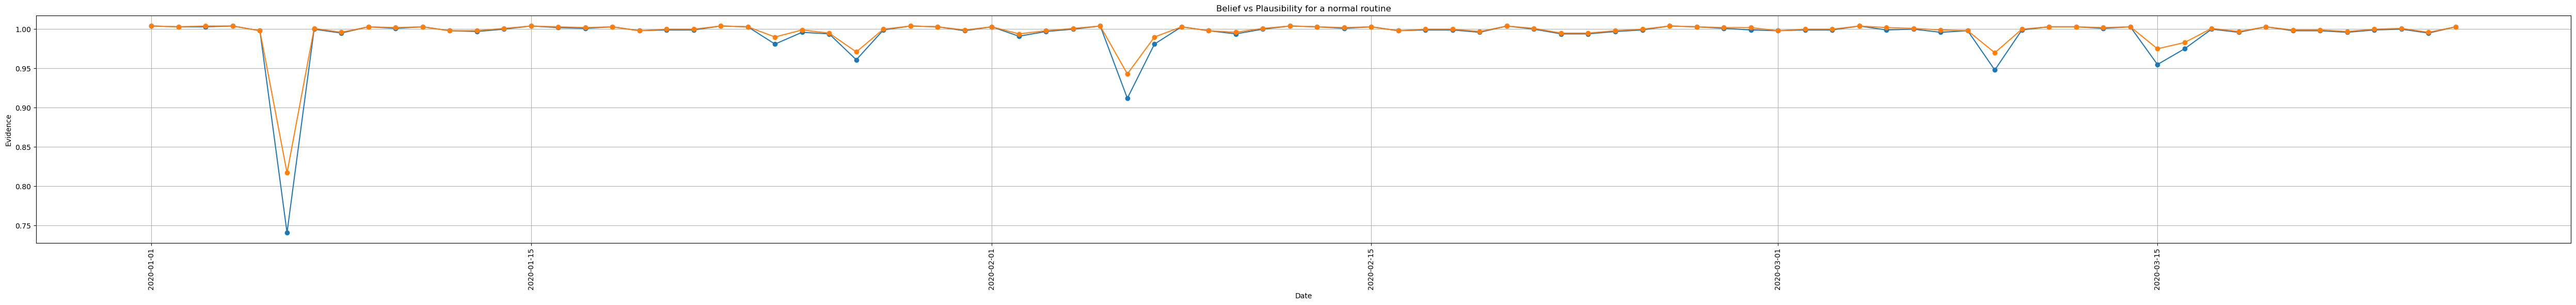

In [62]:
plot_results_daily(bl_pl_daily)

In [68]:
bl_pl_daily.loc['2020-01-06']['results']['results']

{'m(h1)': 0.741,
 'm(h2)': 0.181,
 'm(h3)': 0.076,
 'bel_1': 0.741,
 'bel_2': 0.181,
 'bel_3': 0.998,
 'pl_1': 0.817,
 'pl_2': 0.257,
 'pl_3': 0.998}

In [69]:
bl_pl_daily.loc['2020-01-05']['results']['results']

{'m(h1)': 0.998,
 'm(h2)': 0.001,
 'm(h3)': 0.0,
 'bel_1': 0.998,
 'bel_2': 0.001,
 'bel_3': 0.999,
 'pl_1': 0.998,
 'pl_2': 0.001,
 'pl_3': 0.999}

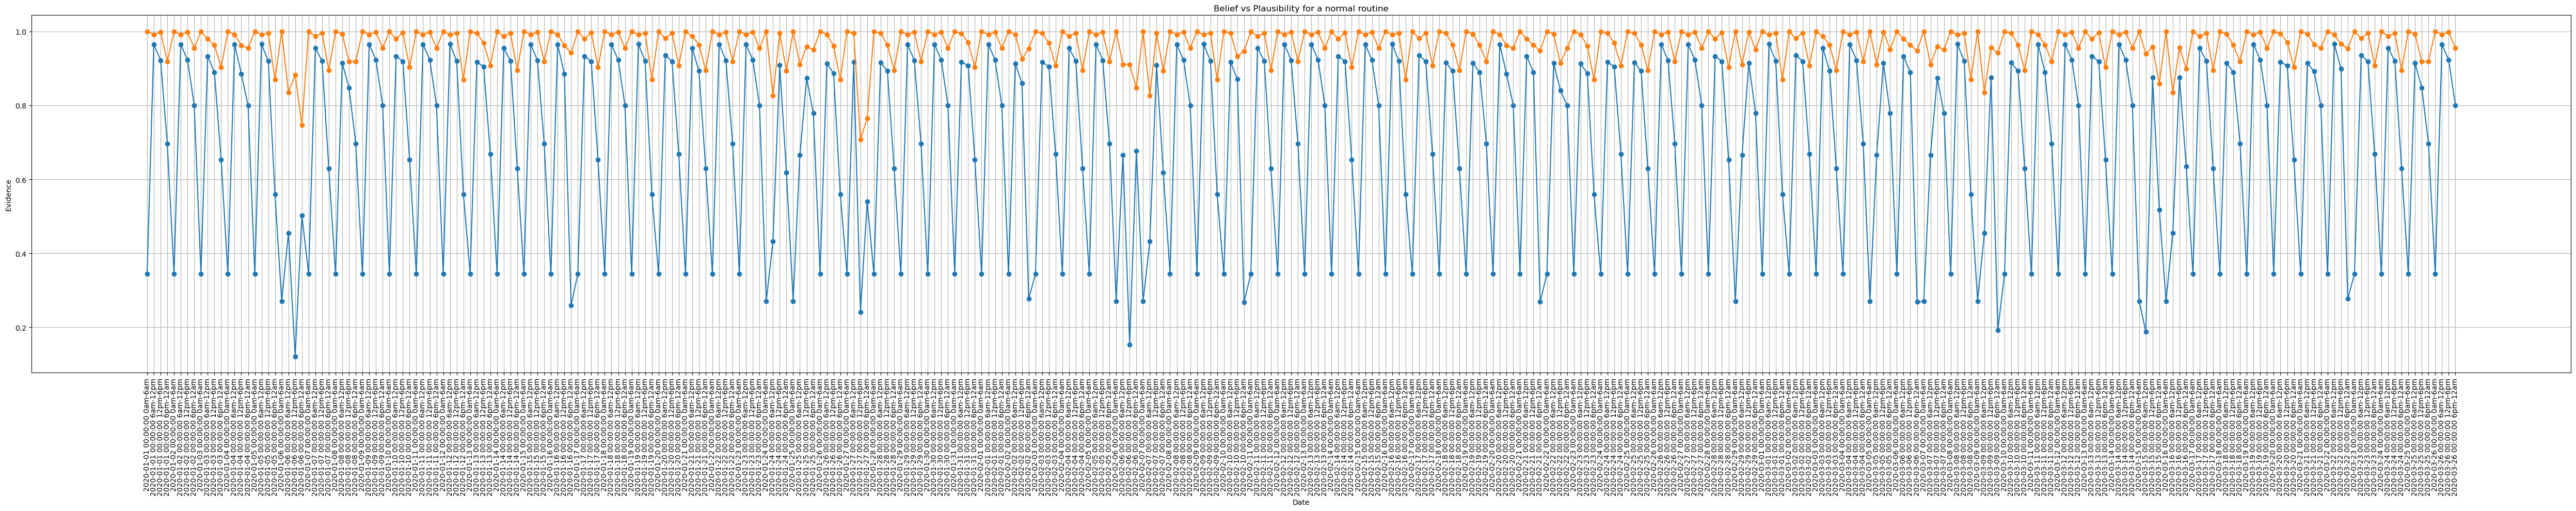

In [64]:
plot_results(bl_pl)

In [66]:
bl_pl2 = calculate_belief_and_plausibility(fusion1)
bl_pl2_daily = calculate_belief_and_plausibility_daily(daily_fusion2)

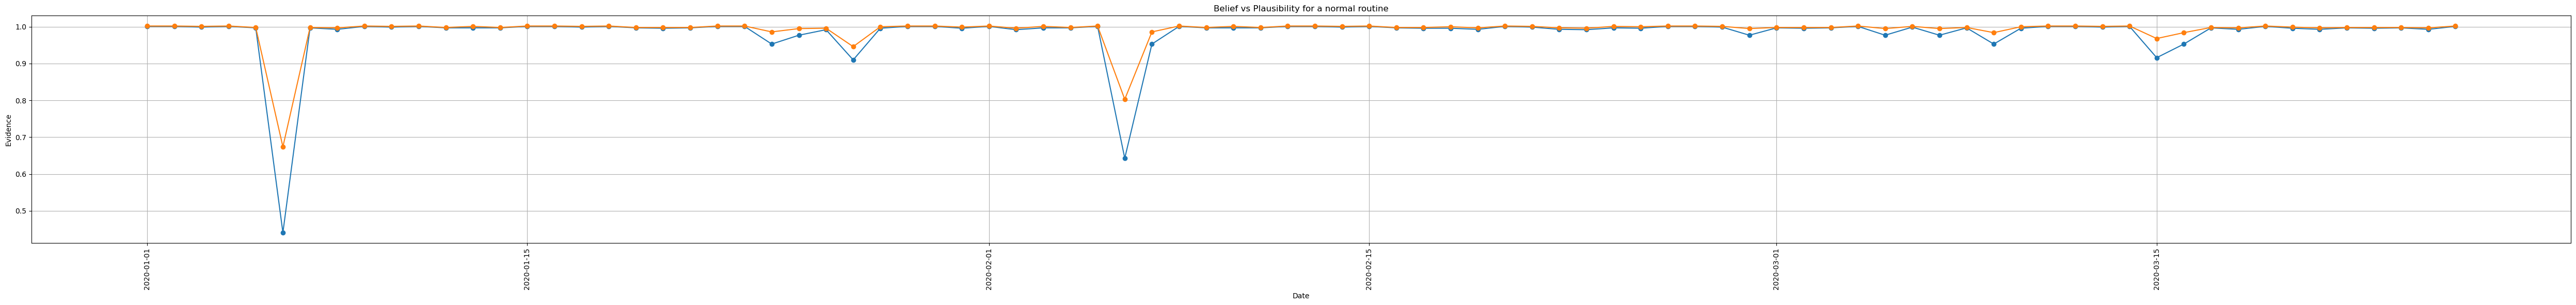

In [67]:
plot_results_daily(bl_pl2_daily)